In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

Generate random (equivalent to Latin Hypercube sampling done in Optislang) feature vectors

In [6]:
X=np.array(10*np.random.randn(37,5))

In [7]:
X

array([[ -7.38872215,  -6.28957753,   6.819686  ,   8.10987977,
          0.92242471],
       [  2.51686687,   8.72150182,  -0.34772539,   7.46757714,
         20.26554417],
       [ -9.93162151,  -4.3286414 ,   6.94437285,   6.45535161,
         14.25537938],
       [ 13.34688292,  -8.63773021, -11.80295827,  -2.58879792,
          3.86330894],
       [-10.3046628 ,   3.9141509 ,  -0.88637617,  -2.32345239,
          1.52821185],
       [-17.97593833,   8.43157203,   8.1599467 , -13.0653826 ,
          7.53787679],
       [ -2.45161959,   3.38612862,  -6.44654707,   2.29959864,
          2.22229875],
       [-15.56864179,   0.39474316,  -3.17137514,   0.74041056,
         12.72028708],
       [-14.94190981,   3.89184527,  -5.44808407,  -1.53682821,
         -6.94776291],
       [ -3.80699547,  -2.40142632,  -5.92941634,  -2.66033167,
         -3.68069438],
       [ -3.98518558,  15.75538472,   2.23826355,  12.25076212,
         -8.36256568],
       [ -3.41549456,  13.52608576,  16.385

In [8]:
df=pd.DataFrame(X,columns=['Feature'+str(l) for l in range(1,6)])

In [9]:
df.head()

,Feature1,Feature2,Feature3,Feature4,Feature5
0,-7.388722,-6.289578,6.819686,8.109880,0.922425
1,2.516867,8.721502,-0.347725,7.467577,20.265544
2,-9.931622,-4.328641,6.944373,6.455352,14.255379
3,13.346883,-8.637730,-11.802958,-2.588798,3.863309
4,-10.304663,3.914151,-0.886376,-2.323452,1.528212


Plot the random distributions of input features

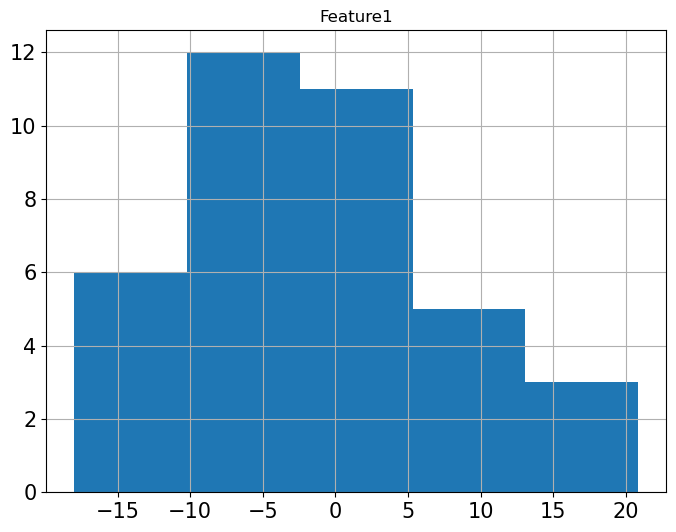

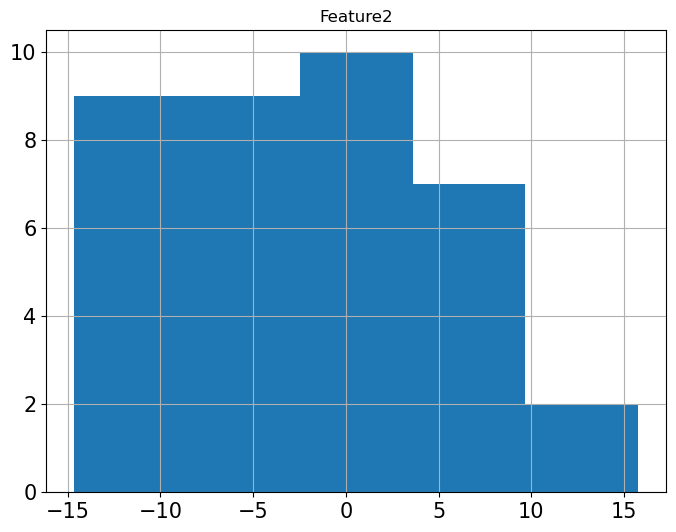

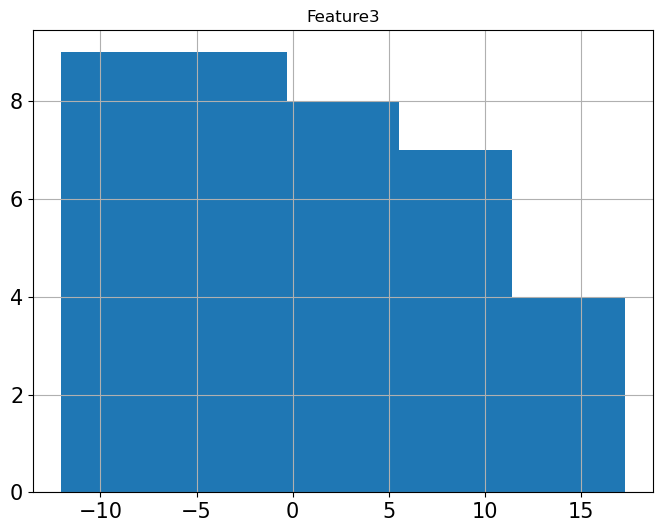

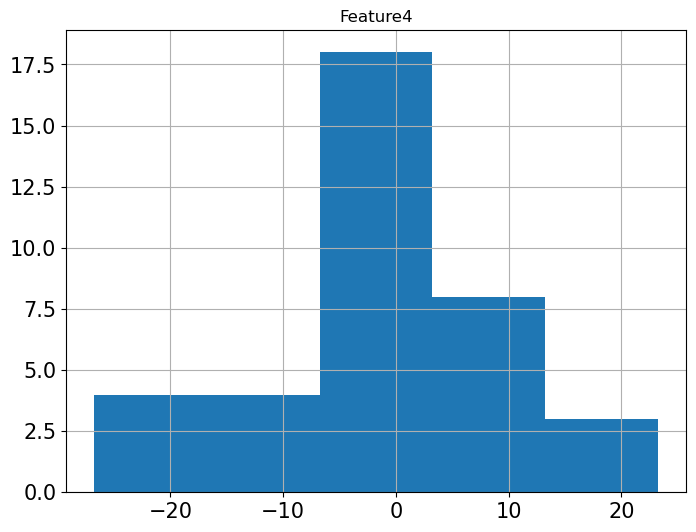

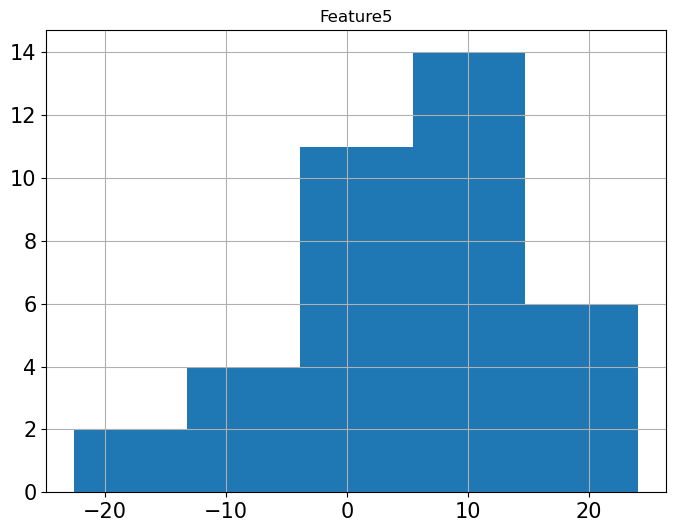

In [11]:
for i in df.columns:
    df.hist(i,bins=5,xlabelsize=15,ylabelsize=15,figsize=(8,6))

In [12]:
df['y']=5*df['Feature1']**2+13*df['Feature2']+0.1*df['Feature3']**2*df['Feature1'] \
+2*df['Feature4']*df['Feature5']+0.1*df['Feature5']**3+0.8*df['Feature1']*df['Feature4']*df['Feature5'] \
+30*np.random.normal(loc=5,scale=2)

In [13]:
df.head()

,Feature1,Feature2,Feature3,Feature4,Feature5,y
0,-7.388722,-6.289578,6.819686,8.109880,0.922425,268.224634
1,2.516867,8.721502,-0.347725,7.467577,20.265544,1725.318590
2,-9.931622,-4.328641,6.944373,6.455352,14.255379,272.168739
3,13.346883,-8.637730,-11.802958,-2.588798,3.863309,983.880486
4,-10.304663,3.914151,-0.886376,-2.323452,1.528212,744.096625


Plot single-variable scatterplots

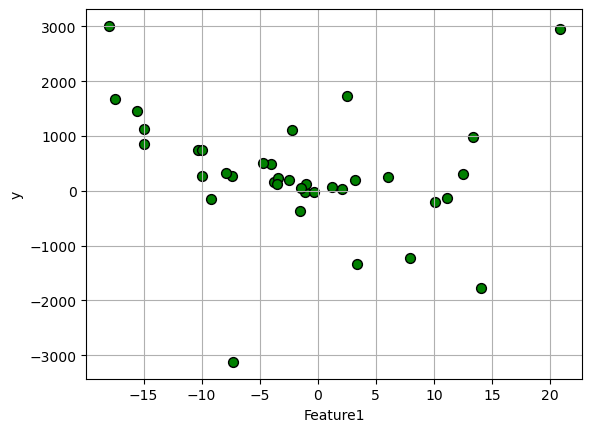

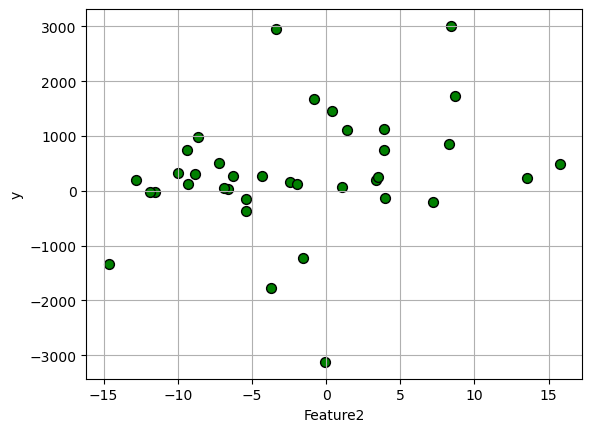

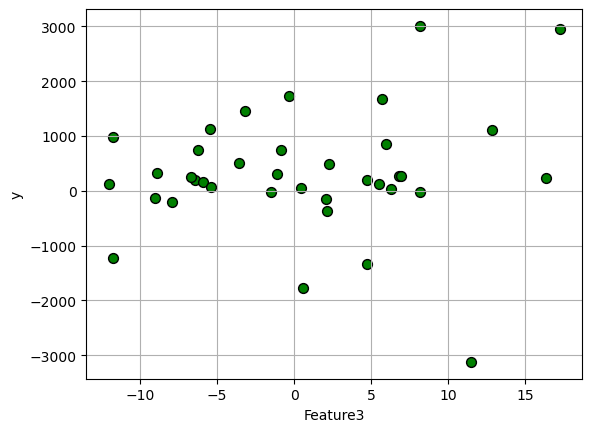

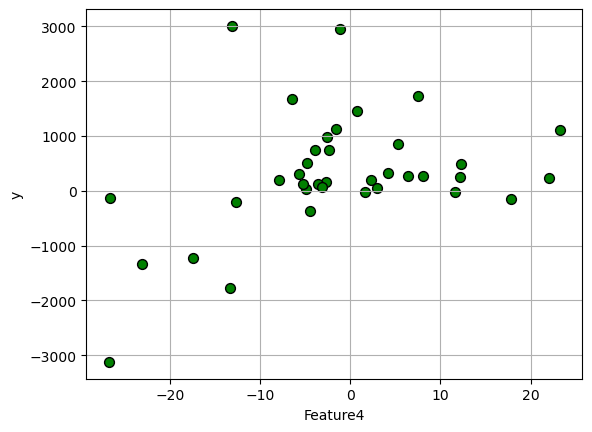

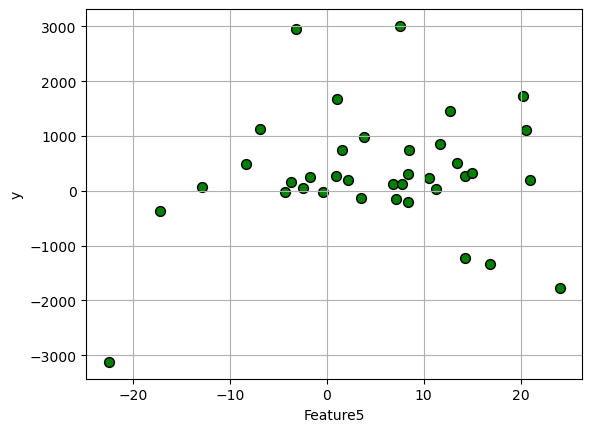

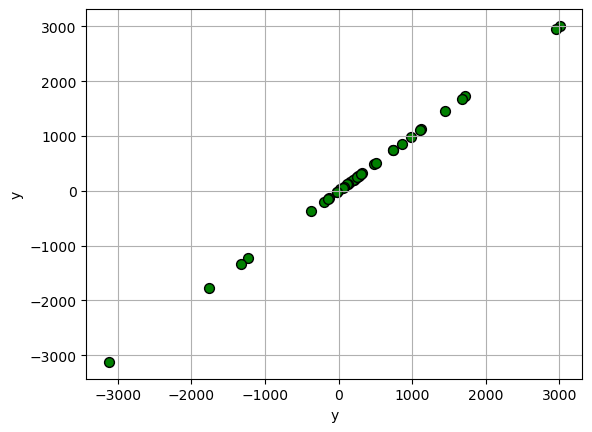

In [15]:
for i in df.columns:
    df.plot.scatter(i,'y', edgecolors=(0,0,0),s=50,c='g',grid=True)

Standard linear regression

In [17]:
from sklearn.linear_model import LinearRegression

In [18]:
linear_model = LinearRegression()

In [19]:
X_linear=df.drop('y',axis=1)
y_linear=df['y']

In [20]:
linear_model.fit(X_linear,y_linear)

LinearRegression()

In [21]:
y_pred_linear = linear_model.predict(X_linear)

## R-square of simple linear fit is very bad, coefficients have no meaning i.e. we did not 'learn' the function

In [23]:
RMSE_linear = np.sqrt(np.sum(np.square(y_pred_linear-y_linear)))

In [24]:
RMSE_linear 

5972.638249254645

In [25]:
coeff_linear = pd.DataFrame(linear_model.coef_,index=df.drop('y',axis=1).columns, columns=['Linear model coefficients'])
coeff_linear

,Linear model coefficients
Feature1,-14.187684
Feature2,28.256281
Feature3,5.113881
Feature4,26.872482
Feature5,15.156193


In [26]:
print ("R2 value of linear model:",linear_model.score(X_linear,y_linear))

R2 value of linear model: 0.20325459087390296


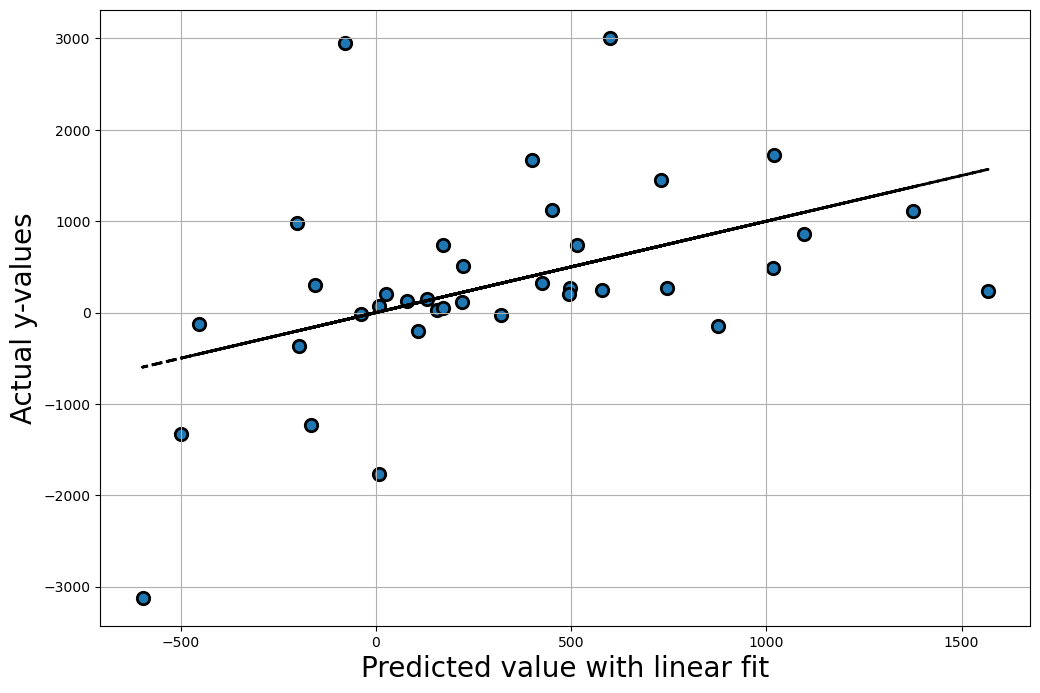

In [27]:
plt.figure(figsize=(12,8))
plt.xlabel("Predicted value with linear fit",fontsize=20)
plt.ylabel("Actual y-values",fontsize=20)
plt.grid(1)
plt.scatter(y_pred_linear,y_linear,edgecolors=(0,0,0),lw=2,s=80)
plt.plot(y_pred_linear,y_pred_linear, 'k--', lw=2)

### Create polynomial features

In [29]:
from sklearn.preprocessing import PolynomialFeatures

In [51]:
poly = PolynomialFeatures(3,include_bias=False)

In [59]:
X_poly = poly.fit_transform(X)
X_poly_feature_name = poly.get_feature_names_out(['Feature'+str(l) for l in range(1,6)])
print(X_poly_feature_name)
print(len(X_poly_feature_name))

['Feature1' 'Feature2' 'Feature3' 'Feature4' 'Feature5' 'Feature1^2'
 'Feature1 Feature2' 'Feature1 Feature3' 'Feature1 Feature4'
 'Feature1 Feature5' 'Feature2^2' 'Feature2 Feature3' 'Feature2 Feature4'
 'Feature2 Feature5' 'Feature3^2' 'Feature3 Feature4' 'Feature3 Feature5'
 'Feature4^2' 'Feature4 Feature5' 'Feature5^2' 'Feature1^3'
 'Feature1^2 Feature2' 'Feature1^2 Feature3' 'Feature1^2 Feature4'
 'Feature1^2 Feature5' 'Feature1 Feature2^2' 'Feature1 Feature2 Feature3'
 'Feature1 Feature2 Feature4' 'Feature1 Feature2 Feature5'
 'Feature1 Feature3^2' 'Feature1 Feature3 Feature4'
 'Feature1 Feature3 Feature5' 'Feature1 Feature4^2'
 'Feature1 Feature4 Feature5' 'Feature1 Feature5^2' 'Feature2^3'
 'Feature2^2 Feature3' 'Feature2^2 Feature4' 'Feature2^2 Feature5'
 'Feature2 Feature3^2' 'Feature2 Feature3 Feature4'
 'Feature2 Feature3 Feature5' 'Feature2 Feature4^2'
 'Feature2 Feature4 Feature5' 'Feature2 Feature5^2' 'Feature3^3'
 'Feature3^2 Feature4' 'Feature3^2 Feature5' 'Feature3 Fe

In [61]:
df_poly = pd.DataFrame(X_poly, columns=X_poly_feature_name)
df_poly.head()

,Feature1,Feature2,Feature3,Feature4,Feature5,Feature1^2,Feature1 Feature2,Feature1 Feature3,Feature1 Feature4,Feature1 Feature5,...,Feature3^3,Feature3^2 Feature4,Feature3^2 Feature5,Feature3 Feature4^2,Feature3 Feature4 Feature5,Feature3 Feature5^2,Feature4^3,Feature4^2 Feature5,Feature4 Feature5^2,Feature5^3
0,-7.388722,-6.289578,6.819686,8.109880,0.922425,54.593215,46.471941,-50.388765,-59.921648,-6.815540,...,317.170756,377.175239,42.900237,448.531770,51.016390,5.802648,533.388008,60.668012,6.900432,0.784861
1,2.516867,8.721502,-0.347725,7.467577,20.265544,6.334619,21.950859,-0.875179,18.794897,51.005677,...,-0.042045,0.902927,2.450367,-19.390805,-52.622853,-142.808133,416.427260,1130.102159,3066.876284,8322.902551
2,-9.931622,-4.328641,6.944373,6.455352,14.255379,98.637106,42.990428,-68.968883,-64.112109,-141.579032,...,334.887619,311.304905,687.455895,289.382881,639.045400,1411.206571,269.004601,594.043961,1311.829709,2896.918914
3,13.346883,-8.637730,-11.802958,-2.588798,3.863309,178.139284,-115.286774,-157.532702,-34.552383,51.563132,...,-1644.268039,-360.644983,538.196888,-79.101947,118.045235,-176.160993,-17.349799,25.891412,-38.638213,57.660489
4,-10.304663,3.914151,-0.886376,-2.323452,1.528212,106.186075,-40.334005,9.133808,23.942393,-15.747708,...,-0.696393,-1.825450,1.200659,-4.785041,3.147280,-2.070071,-12.542997,8.249946,-5.426264,3.569034


In [63]:
df_poly['y']=df['y']
df_poly.head()

,Feature1,Feature2,Feature3,Feature4,Feature5,Feature1^2,Feature1 Feature2,Feature1 Feature3,Feature1 Feature4,Feature1 Feature5,...,Feature3^2 Feature4,Feature3^2 Feature5,Feature3 Feature4^2,Feature3 Feature4 Feature5,Feature3 Feature5^2,Feature4^3,Feature4^2 Feature5,Feature4 Feature5^2,Feature5^3,y
0,-7.388722,-6.289578,6.819686,8.109880,0.922425,54.593215,46.471941,-50.388765,-59.921648,-6.815540,...,377.175239,42.900237,448.531770,51.016390,5.802648,533.388008,60.668012,6.900432,0.784861,268.224634
1,2.516867,8.721502,-0.347725,7.467577,20.265544,6.334619,21.950859,-0.875179,18.794897,51.005677,...,0.902927,2.450367,-19.390805,-52.622853,-142.808133,416.427260,1130.102159,3066.876284,8322.902551,1725.318590
2,-9.931622,-4.328641,6.944373,6.455352,14.255379,98.637106,42.990428,-68.968883,-64.112109,-141.579032,...,311.304905,687.455895,289.382881,639.045400,1411.206571,269.004601,594.043961,1311.829709,2896.918914,272.168739
3,13.346883,-8.637730,-11.802958,-2.588798,3.863309,178.139284,-115.286774,-157.532702,-34.552383,51.563132,...,-360.644983,538.196888,-79.101947,118.045235,-176.160993,-17.349799,25.891412,-38.638213,57.660489,983.880486
4,-10.304663,3.914151,-0.886376,-2.323452,1.528212,106.186075,-40.334005,9.133808,23.942393,-15.747708,...,-1.825450,1.200659,-4.785041,3.147280,-2.070071,-12.542997,8.249946,-5.426264,3.569034,744.096625


In [65]:
X_train=df_poly.drop('y',axis=1)
y_train=df_poly['y']

In [67]:
X_train

,Feature1,Feature2,Feature3,Feature4,Feature5,Feature1^2,Feature1 Feature2,Feature1 Feature3,Feature1 Feature4,Feature1 Feature5,...,Feature3^3,Feature3^2 Feature4,Feature3^2 Feature5,Feature3 Feature4^2,Feature3 Feature4 Feature5,Feature3 Feature5^2,Feature4^3,Feature4^2 Feature5,Feature4 Feature5^2,Feature5^3
0,-7.388722,-6.289578,6.819686,8.109880,0.922425,54.593215,46.471941,-50.388765,-59.921648,-6.815540,...,317.170756,377.175239,42.900237,448.531770,51.016390,5.802648,533.388008,60.668012,6.900432,0.784861
1,2.516867,8.721502,-0.347725,7.467577,20.265544,6.334619,21.950859,-0.875179,18.794897,51.005677,...,-0.042045,0.902927,2.450367,-19.390805,-52.622853,-142.808133,416.427260,1130.102159,3066.876284,8322.902551
2,-9.931622,-4.328641,6.944373,6.455352,14.255379,98.637106,42.990428,-68.968883,-64.112109,-141.579032,...,334.887619,311.304905,687.455895,289.382881,639.045400,1411.206571,269.004601,594.043961,1311.829709,2896.918914
3,13.346883,-8.637730,-11.802958,-2.588798,3.863309,178.139284,-115.286774,-157.532702,-34.552383,51.563132,...,-1644.268039,-360.644983,538.196888,-79.101947,118.045235,-176.160993,-17.349799,25.891412,-38.638213,57.660489
4,-10.304663,3.914151,-0.886376,-2.323452,1.528212,106.186075,-40.334005,9.133808,23.942393,-15.747708,...,-0.696393,-1.825450,1.200659,-4.785041,3.147280,-2.070071,-12.542997,8.249946,-5.426264,3.569034
5,-17.975938,8.431572,8.159947,-13.065383,7.537877,323.134359,-151.565419,-146.682699,234.862512,-135.500408,...,543.327849,-869.954974,501.907492,1392.937356,-803.634344,463.644798,-2230.315976,1286.747396,-742.369637,428.299043
6,-2.451620,3.386129,-6.446547,2.299599,2.222299,6.010439,-8.301499,15.804481,-5.637741,-5.448231,...,-267.905405,95.566649,92.354223,-34.090333,-32.944403,-31.836993,12.160632,11.751858,11.356825,10.975071
7,-15.568642,0.394743,-3.171375,0.740411,12.720287,242.382607,-6.145615,49.374004,-11.527187,-198.037593,...,-31.896487,7.446768,127.935817,-1.738573,-29.868756,-513.146585,0.405899,6.973361,119.802651,2058.214997
8,-14.941910,3.891845,-5.448084,-1.536828,-6.947763,223.260669,-58.151601,81.404781,22.963148,103.812847,...,-161.707962,-45.615551,-206.220859,-12.867508,-58.172016,-262.986697,-3.629744,-16.409511,-74.184864,-335.378308
9,-3.806995,-2.401426,-5.929416,-2.660332,-3.680694,14.493215,9.142219,22.573261,10.127871,14.012387,...,-208.466290,-93.531883,-129.405772,-41.964641,-58.060061,-80.328834,-18.828137,-26.049616,-36.040873,-49.864248


In [69]:
y_train

0      268.224634
1     1725.318590
2      272.168739
3      983.880486
4      744.096625
5     3008.306285
6      205.743930
7     1449.306215
8     1123.295717
9      153.203334
10     486.038894
11     230.896128
12    1673.832963
13     858.222729
14     199.057389
15      25.229557
16   -1231.105965
17     -20.611756
18     319.769338
19     131.557399
20    -130.119926
21    2955.472763
22     118.893324
23    -197.693204
24    1112.906997
25     737.293656
26   -3121.843264
27   -1767.197387
28     249.518119
29     510.779357
30     299.434842
31    -368.744940
32      68.752636
33    -150.196397
34      54.081211
35     -24.674076
36   -1327.949852
Name: y, dtype: float64

## Polynomial model without regularization and cross-validation

In [74]:
poly = LinearRegression()

In [76]:
model_poly=poly.fit(X_train,y_train)
y_poly = poly.predict(X_train)
RMSE_poly=np.sqrt(np.sum(np.square(y_poly-y_train)))
print("Root-mean-square error of simple polynomial model:",RMSE_poly)

Root-mean-square error of simple polynomial model: 1.3159330116830801e-11


In [78]:
coeff_poly = pd.DataFrame(model_poly.coef_,index=df_poly.drop('y',axis=1).columns, 
                          columns=['Coefficients polynomial model'])
coeff_poly

,Coefficients polynomial model
Feature1,-0.082681
Feature2,0.132928
Feature3,-0.072344
Feature4,-0.053531
Feature5,0.065578
Feature1^2,1.281074
Feature1 Feature2,-0.555945
Feature1 Feature3,0.964337
Feature1 Feature4,-0.166827
Feature1 Feature5,0.383552


In [80]:
print ("R2 value of simple polynomial model:",model_poly.score(X_train,y_train))

R2 value of simple polynomial model: 1.0


R-square value of the simple polynomial model is perfect but the model is flawed as shown above i.e. it learned wrong coefficients and overfitted the to the data

### Metamodel (Optislang style :) - polynomial model with cross-validation and LASSO regularization

** This is an advanced machine learning method which prevents over-fitting by penalizing high-valued coefficients i.e. keep them bounded **

In [85]:
from sklearn.linear_model import LassoCV

In [89]:
model1 = LassoCV(cv=10,verbose=0,eps=0.001,n_alphas=100, tol=0.0001,max_iter=5000)

In [91]:
model1.fit(X_train,y_train)

LassoCV(cv=10, max_iter=5000, verbose=0)

In [93]:
y_pred1 = np.array(model1.predict(X_train))

In [95]:
RMSE_1=np.sqrt(np.sum(np.square(y_pred1-y_train)))
print("Root-mean-square error of Metamodel:",RMSE_1)

Root-mean-square error of Metamodel: 1539.136391705871


In [97]:
coeff1 = pd.DataFrame(model1.coef_,index=df_poly.drop('y',axis=1).columns, columns=['Coefficients Metamodel'])
coeff1

,Coefficients Metamodel
Feature1,-0.000000
Feature2,0.000000
Feature3,-0.000000
Feature4,-0.000000
Feature5,0.000000
Feature1^2,0.000000
Feature1 Feature2,-0.000000
Feature1 Feature3,0.000000
Feature1 Feature4,0.000000
Feature1 Feature5,-0.000000


In [99]:
model1.score(X_train,y_train)

0.9470895614677306

In [101]:
model1.alpha_

48024.81687628259

## Printing only the non-zero coefficients of the metamodel

In [104]:
coeff1[coeff1['Coefficients Metamodel']!=0]

,Coefficients Metamodel
Feature1^3,-0.149966
Feature1^2 Feature3,0.120076
Feature1^2 Feature4,-0.207606
Feature1 Feature3^2,0.386452
Feature1 Feature4^2,-0.055146
Feature1 Feature4 Feature5,0.289962
Feature1 Feature5^2,-0.054090
Feature2 Feature4^2,0.016928
Feature2 Feature5^2,0.023488
Feature3^3,0.038712


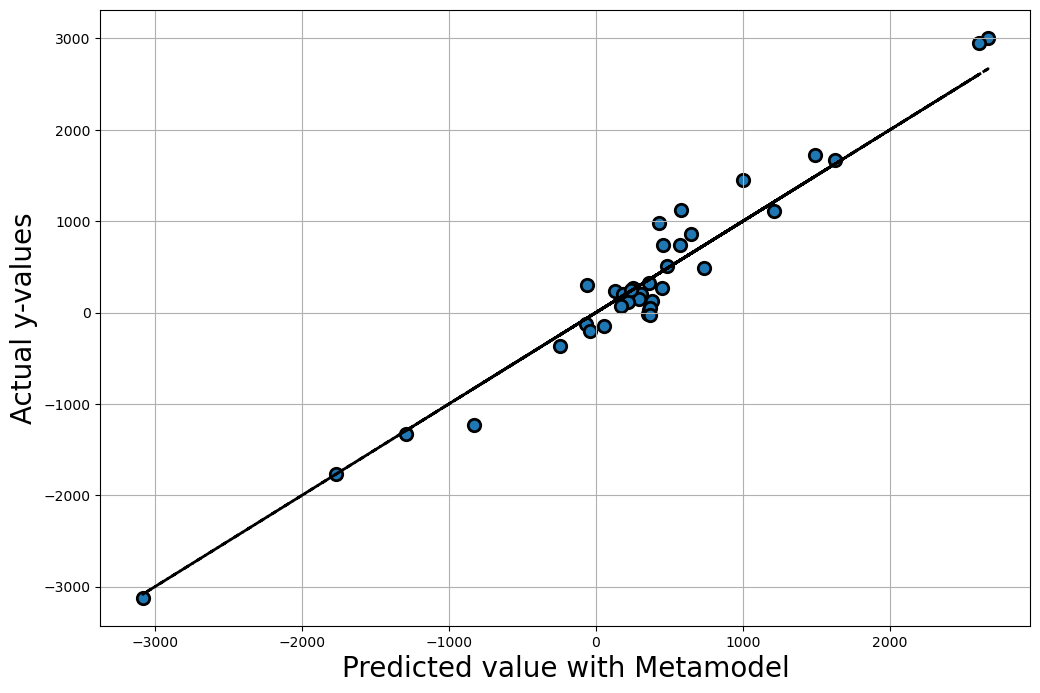

In [106]:
plt.figure(figsize=(12,8))
plt.xlabel("Predicted value with Metamodel",fontsize=20)
plt.ylabel("Actual y-values",fontsize=20)
plt.grid(1)
plt.scatter(y_pred1,y_train,edgecolors=(0,0,0),lw=2,s=80)
plt.plot(y_pred1,y_pred1, 'k--', lw=2)

(-6.619344505404782,
 -3.319344505404782,
 -463548.49664184364,
 9793605.058348652)

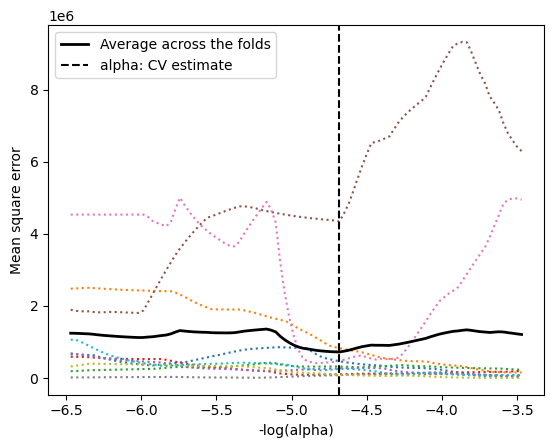

In [108]:
# Display results
m_log_alphas = -np.log10(model1.alphas_)

plt.figure()
ymin, ymax = 2300, 3800
plt.plot(m_log_alphas, model1.mse_path_, ':')
plt.plot(m_log_alphas, model1.mse_path_.mean(axis=-1), 'k',
         label='Average across the folds', linewidth=2)
plt.axvline(-np.log10(model1.alpha_), linestyle='--', color='k',
            label='alpha: CV estimate')
plt.legend()

plt.xlabel('-log(alpha)')
plt.ylabel('Mean square error')
plt.axis('tight')